In [35]:
# This notebook follows a tutorial to learn how to use decision trees
# source : http://cedric.cnam.fr/vertigo/Cours/ml2/tpArbresDecision.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
%matplotlib inline


In [41]:
iris = load_iris()
["Petal length","Petal Width","Sepal Length","Sepal Width"]
# get an overview of the dataset using pandas
pandas_iris = pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
pandas_iris['Species'] = iris['target']
pandas_iris['Species'] = pandas_iris['Species'].apply(lambda x: iris['target_names'][x])


pandas_iris.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


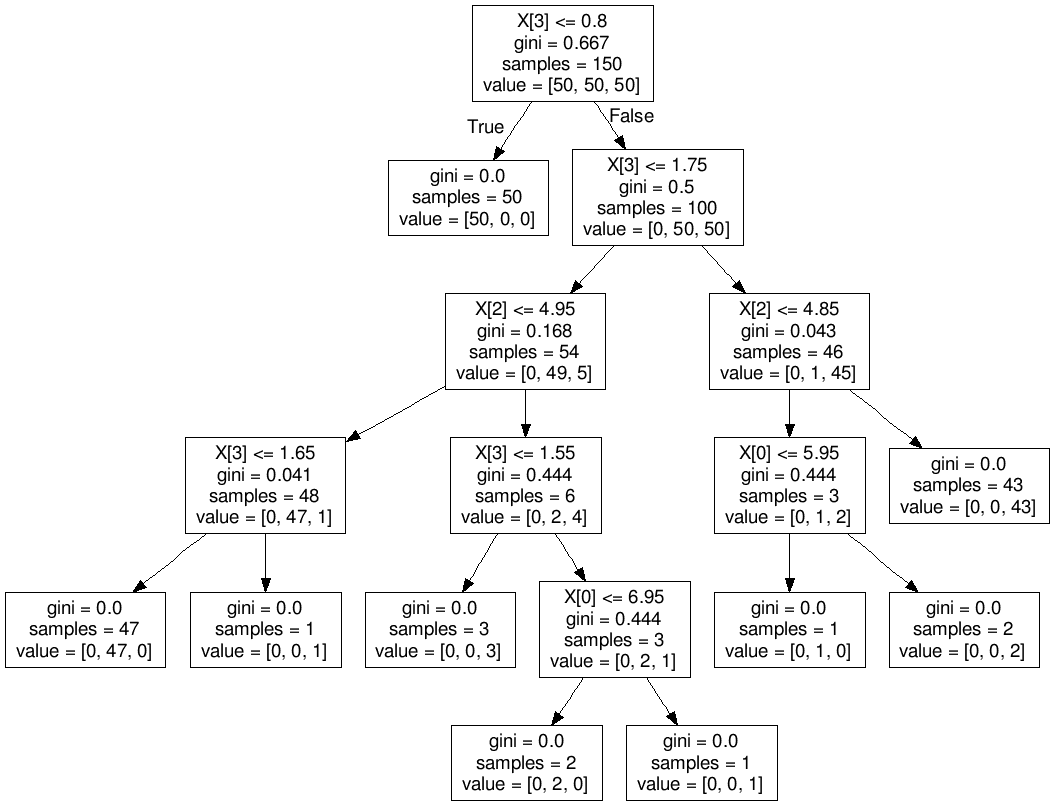

In [42]:
# Creation of a first decision tree without setting any parameter 

clf = DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)
    
Image("iris.png")

In [45]:
clf.predict(iris.data[:1, :])


array([0])

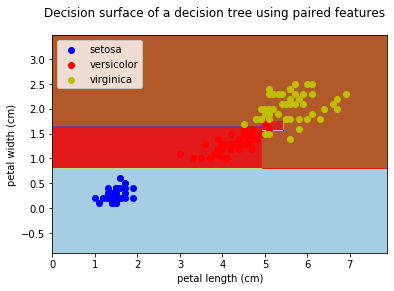

In [30]:

# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02


# Choisir les attributs longueur et largeur des pétales
pair = [2, 3]

# Garder seulement les deux attributs
X = iris.data[:, pair]
y = iris.target

# Apprentissage de l'arbre
clf = DecisionTreeClassifier().fit(X, y)

# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.savefig('fig.png')
plt.show()